# Big Bio Data Analysis: Assignement One

## Assignment Due: 13-Nov-2021

## Please Read The Instructions Below:

- This assignment is to be done individually.
- Please state your name clearly at the top of your notebook in markdown.
- Please state your registration number clearly at the top of your notebook in markdown.
- No cheating/duplicating of work will be tolerated.
- Please leave comments to capture the ideas you are trying to implement, failure to do so will lead to loss of marks.
- This assignment is marked out of 20 and contributes to your final result in this course.

## Dataset:
- For this assignment we shall use the **Heart Disease** dataset which can be found in the Data Folder.
- Please use the appropriate data for this assignment.

# Assignment Instruction:

Using the provided dataset, you are going to accomplish the task of taking it through the steps of machine learning as discussed in class. The steps to be looked at are stated below.

    - Data Cleansing: Clean your data appropriately
    - Data Preprocessing: Make the necessary transformations that you think are useful
    - EDA (Exploratory Data Analysis): Plot visuals to explain your investigations (all visuals should be done in seaborn library)
    - Creating Training/Validation Datasets: split your data into test and train: test data should be 25% of the total data.
    - Algorithm Selection: sample at least 8 algorithms of your own choice in this assignment and make appropriate comparisons.
    - Model Training: Train a base model from your final choice of algorithm
    - Model Testing: Test the model on your test data.
    - Communicate your findings.

### Please leave  your details below and change the name of this file to your own name: ie instead of Assignment One.ipyn it can be: 
```
Assignment One <your name>.ipynb

```
## Name of Student: RAYMOND ATUHE
## Registration Number: 2020/HDO7/22160U

#insert your code here below

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score


from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier

## Data Cleaning

In [3]:
# Read dataset for analysis
heart_df = pd.read_csv("heart.csv")

In [4]:
heart_df.head(6) #Show the first 6 items of the data frame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [5]:
heart_df.shape #Shape of the dataset # Number of rows and columns

(918, 12)

In [89]:
heart_df.info() #print a summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#Summary statistics on the data
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [91]:
heart_df.describe(include=object) #view basic statistics on only string columns

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
#count the number of distinct elememts
print(heart_df.nunique()) 

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [9]:
#list columns names in the dataframe
heart_df.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
# function to check for missing values

def missing (heart_df):
    missing_number = heart_df.isnull().sum().sort_values(ascending=False)
    missing_percent = (heart_df.isnull().sum()/heart_df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing (heart_df)

,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


In [12]:
#Transpose the summary stats
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [13]:
#check for any duplicate values in the dataset

dups = heart_df.duplicated()
print(dups.any())

#list duplicate values in the dataframe
print(heart_df[dups])

False
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [14]:
# delete duplicate rows fro the data frame in case of any
heart_df.drop_duplicates(inplace=True) 

In [17]:
# sum up missing values in the data set.
heart_df.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Data Processing

In [16]:
# count features in each datatype
print(heart_df.dtypes.value_counts())

int64      6
object     5
float64    1
dtype: int64


In [18]:
#Identify duplicates in the dataset
print("We have:", heart_df.duplicated().sum(), "duplicates in the dataset")

We have: 0 duplicates in the dataset


In [19]:
#Identify Missing values in the dataset
print("We have:", heart_df.isnull().sum().sum(), "Missing values in the dataset")

We have: 0 Missing values in the dataset


In [20]:
#Summary statistics in the dataset
print("Below are the Summary statistics in the Heart Failure Prediction datatset", "\n\n", heart_df.describe().T )

print(" \n \n With this dataframe the Target variable is HeartDisease i.e. The chance that anybody is likely to get heart disease based on the input features like gender, age and various test results or not.")

Below are the Summary statistics in the Heart Failure Prediction datatset 

               count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0
 
 
 With this dataframe the Target variable is HeartDisease i.e. The chance that anybody is likely to get heart disease based on the input features like gender, age and various test results or not.


In [21]:
# Transposed Summary statistics for Categorical variables
heart_df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [22]:
#check for distinct elements per feature
for column in heart_df.select_dtypes(include=[np.number]).columns:
    print(f"{column} has {heart_df[column].nunique()} unique values")

Age has 50 unique values
RestingBP has 67 unique values
Cholesterol has 222 unique values
FastingBS has 2 unique values
MaxHR has 119 unique values
Oldpeak has 53 unique values
HeartDisease has 2 unique values


In [24]:
#Counting values under the HeartDisease feature
a = heart_df["HeartDisease"].value_counts() 
a

1    508
0    410
Name: HeartDisease, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Heart Diseases counts')

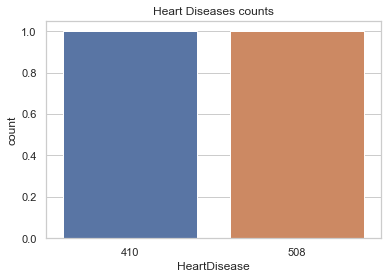

In [118]:
sns.countplot(a, x='HeartDisease').set_title("Heart Diseases counts")

In [31]:
g = heart_df['HeartDisease']
print(f'{round(y.value_counts(normalize=True)[1]*100,2)} %  = \
({g.value_counts()[1]} cases of Heart Disease)\n{round(y.value_counts(normalize=True)[0]*100,2)} %  = ({y.value_counts()[0]} cases have no Heart Disease)')

55.34 %  = (508 cases of Heart Disease)
44.66 %  = (410 cases have no Heart Disease)


In [33]:
#Summary Statistics of the Target Variable
heart_df['HeartDisease'].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [35]:
#Summary statistics of cases with no Heart Disease
heart_df[heart_df['HeartDisease']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,410.0,50.551220,9.444915,28.0,43.00,51.0,57.00,76.0
RestingBP,410.0,130.180488,16.499585,80.0,120.00,130.0,140.00,190.0
Cholesterol,410.0,227.121951,74.634659,0.0,197.25,227.0,266.75,564.0
FastingBS,410.0,0.107317,0.309894,0.0,0.00,0.0,0.00,1.0
MaxHR,410.0,148.151220,23.288067,69.0,134.00,150.0,165.00,202.0
Oldpeak,410.0,0.408049,0.699709,-1.1,0.00,0.0,0.60,4.2
HeartDisease,410.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [37]:
#Measuring Skewness 
#Check Data Normality
print(f"Skewness: {heart_df['HeartDisease'].skew()} \n...................................................................")
print("Skewness per column")
skewness_a = heart_df.skew().sort_values(ascending=False)
skewness_a


Skewness: -0.21508633825088655 
...................................................................
Skewness per column


FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

Understanding SKewness. 

A skewness value of  ` -0.19593302867569365, 0.1798393100516288,  1.2644841750727027 , -0.21508633825088655 , -0.14435941846180994 `  means that the distribution is approximately  symmetric 

A skewness value of   `-0.6100864307268192` and `1.2644841750727027` means that the distribution is approx.   highly skewed 


In [146]:
#Measuring Kurtosis
#Check Data Normality
print(f"Kurtosis: {heart_df['HeartDisease'].kurtosis()} \n ...................................................................")

print("Kurtosis per column ")
kurtosis_a = heart_df.kurtosis().sort_values(ascending=False)
kurtosis_a

Kurtosis: -1.9580084425329685 
 ...................................................................
Kurtosis per column 


RestingBP       3.271251
Oldpeak         1.203064
Cholesterol     0.118208
Age            -0.386140
FastingBS      -0.401960
MaxHR          -0.448248
HeartDisease   -1.958008
dtype: float64

In [38]:
#View Numerical and Categorical Features
f_categorical = heart_df.select_dtypes('object').columns
f_numerical = heart_df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

In [121]:
f_numerical

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

In [39]:
f_categorical

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [40]:
#View Summary of Categorical features
heart_df[f_categorical].head().T

,0,1,2,3,4
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingECG,Normal,Normal,ST,Normal,Normal
ExerciseAngina,N,N,N,Y,N
ST_Slope,Up,Flat,Up,Flat,Up


In [41]:
#View Summary of Categorical features
heart_df[f_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


### EDA (Exploratory Data Analysis): Plot visuals to explain your investigations (all visuals should be done in seaborn library)

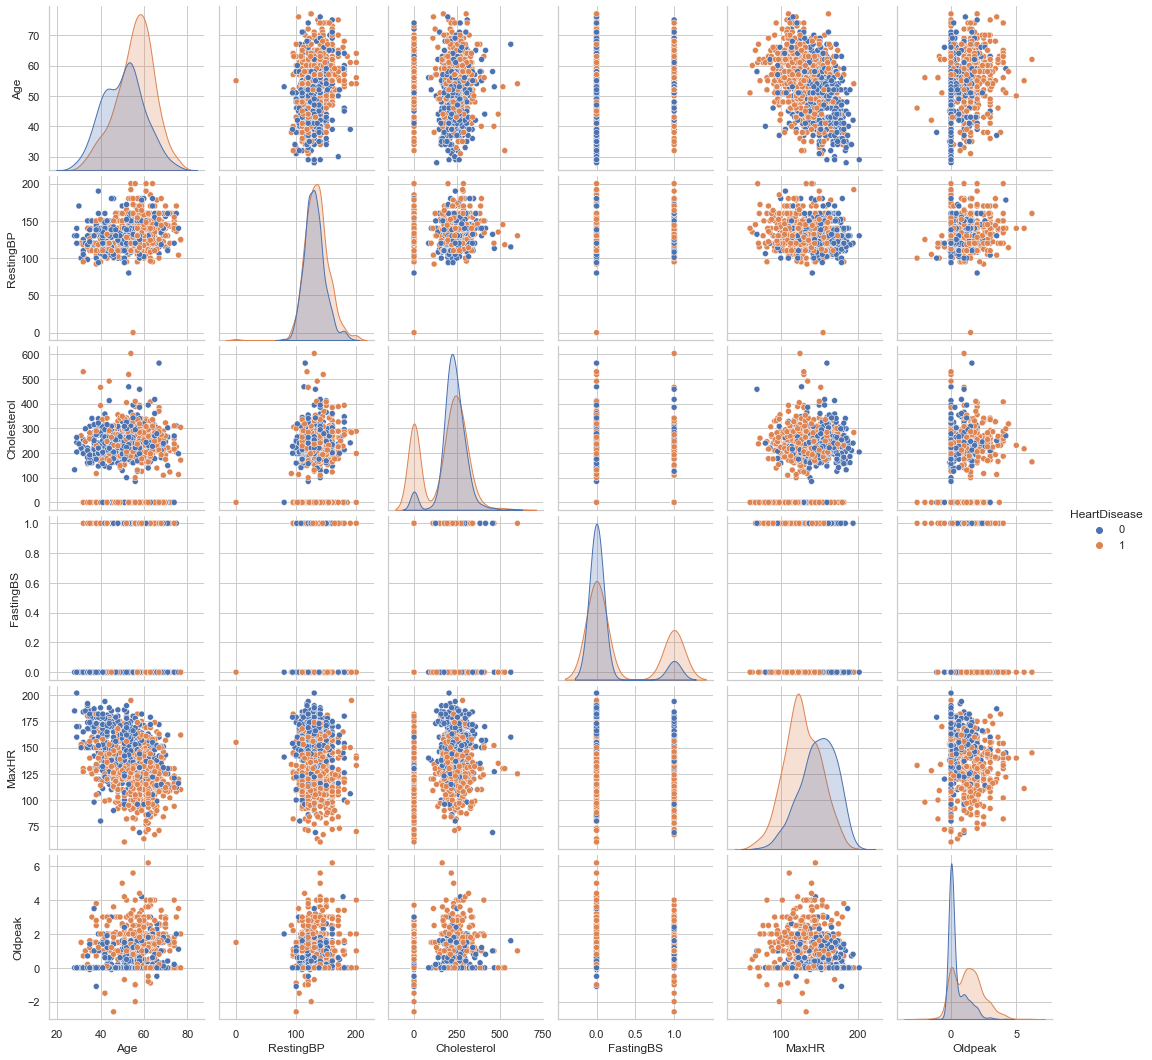

In [119]:
# Plot visualising Disease status in the data
sns.pairplot(data=heart_df, hue='HeartDisease')

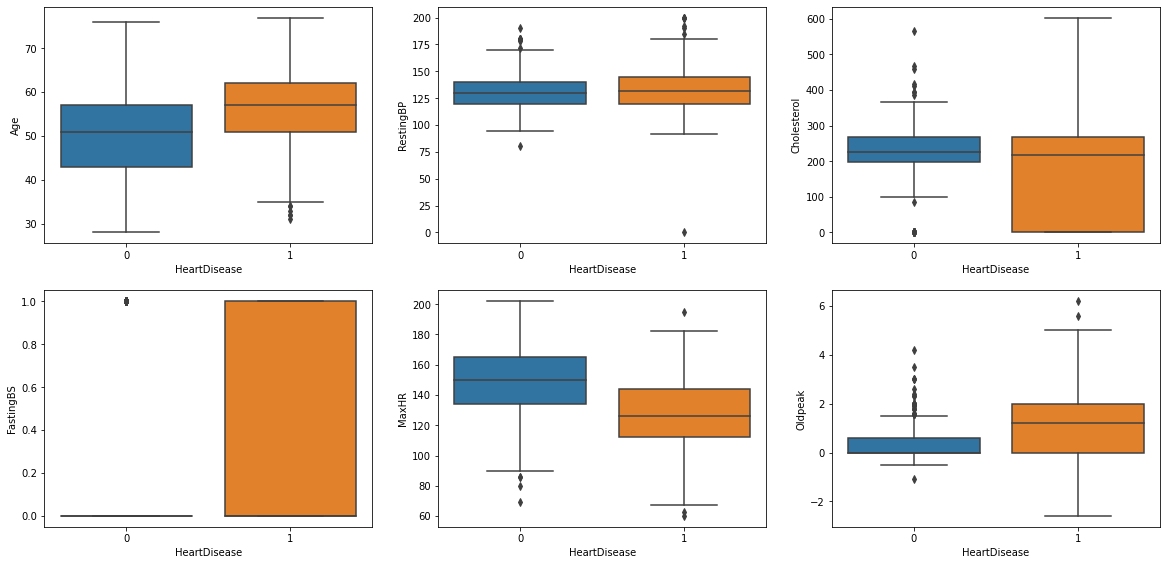

In [77]:
#HIstogram visualising Disease status vs all numerical variables
index = 0
plt.figure(figsize=(20,20))
for feature in f_numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=heart_df)

Text(0.5, 1.0, 'Gender - Heart Diseases')

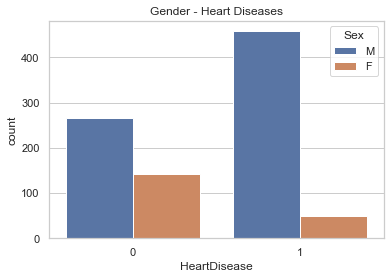

In [120]:
#Boxplot visualising Gender vs Disease status
sns.countplot(x="HeartDisease", data=heart_df, hue = 'Sex').set_title("Gender - Heart Diseases")

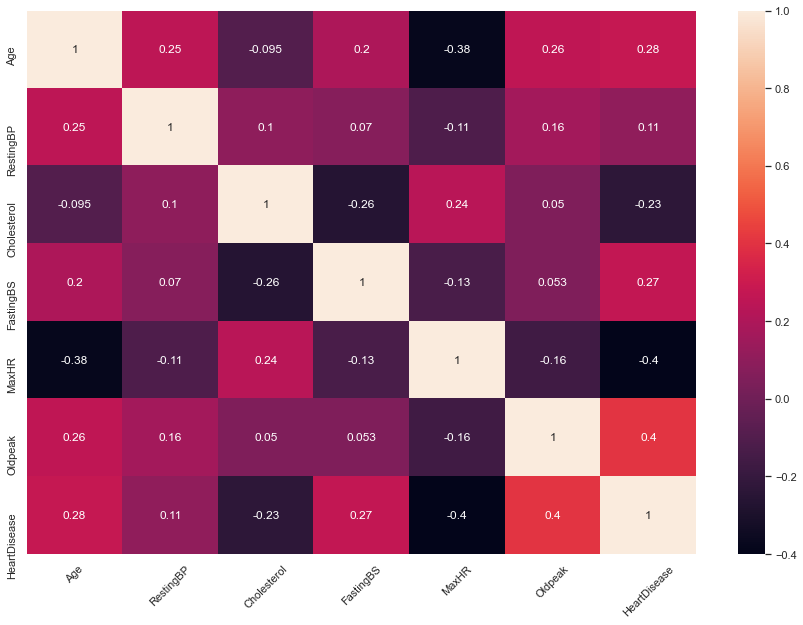

In [122]:
#Heatmap visualising the correlation of variables
plt.figure(figsize=(15, 10))
sns.heatmap(heart_df.corr(), annot=True)
plt.xticks(rotation=45);

In [46]:
#ChestPainType feature summation
heart_df['ChestPainType'].value_counts() 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'RestingBP'),
  Text(3, 0, 'Cholesterol'),
  Text(4, 0, 'FastingBS'),
  Text(5, 0, 'MaxHR'),
  Text(6, 0, 'Oldpeak'),
  Text(7, 0, 'HeartDisease')])

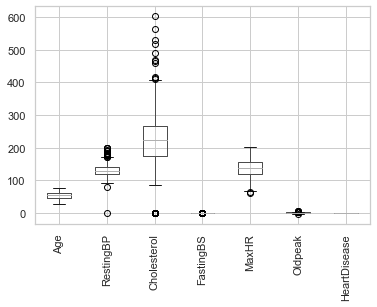

In [98]:
# Checking for outliers
heart_df.boxplot()
plt.xticks(rotation = 90)

In [48]:
#Count how many and Females and Males are in the dataset
heart_df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Age vs Heart Disease')

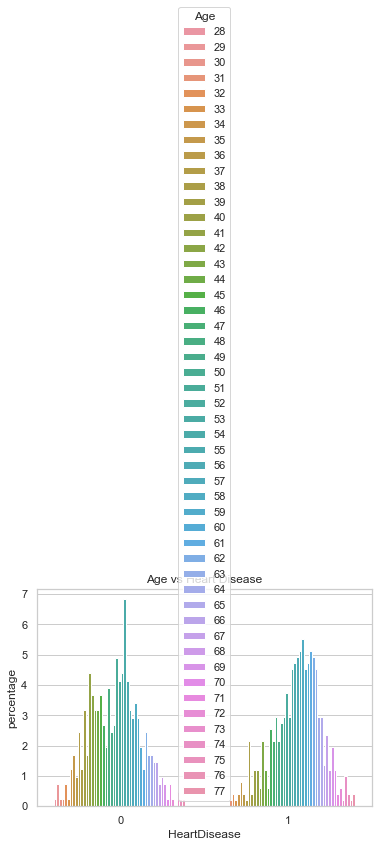

In [95]:
#Visualise Age vs HeartDisease
sns.barplot(x = "HeartDisease", y = "percentage", hue = "Age", data = temp).set_title("Age vs Heart Disease")


In [49]:
#Measure ST_Slope in the dataset
heart_df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

Text(0.5, 1.0, 'ST_Slope - Heart Diseases')

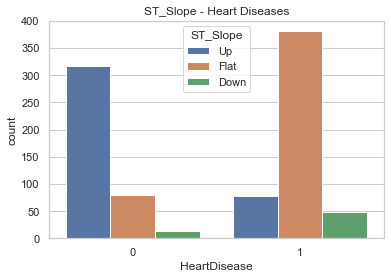

In [130]:
#Visualise ST_Slope vs HeartDisease
sns.countplot(x="HeartDisease", data=heart_df,hue ='ST_Slope').set_title("ST_Slope - Heart Diseases")

In [131]:
#sum categorical variables
heart_df[f_categorical].value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        109
     ATA            Normal      N               Up           64
     ASY            Normal      N               Flat         55
                    ST          Y               Flat         49
     NAP            Normal      N               Up           46
                                                           ... 
F    NAP            ST          Y               Flat          1
     TA             LVH         N               Up            1
                    Normal      N               Down          1
M    ATA            LVH         Y               Flat          1
     TA             ST          Y               Flat          1
Length: 95, dtype: int64

In [132]:
# Convert categorical variable into dummy variables
heart_df = pd.get_dummies(heart_df, drop_first=True)

In [133]:
#Structure of our new dummy dataframe 
heart_df.shape

(918, 16)

In [134]:
#Top rows of the dataset
heart_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


### Creating Training/Validation Datasets: split your data into test and train: test data should be 25% of the total data.

In [135]:
# Splittig the dataset into Train and Test
from sklearn.model_selection import train_test_split

#Separate the columns(features) of the dataset into input patterns and output patterns
X = heart_df.drop(["HeartDisease"], axis=1)
y = heart_df["HeartDisease"]

Splittig the Data into Train and Test
we split the data into a training and test dataset. 

The training set will be used to prepare the models 
and the test set will be used to make new predictions, 
to determine model performance.

In [136]:
#Train,Test & Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

Feature Scaling:- 
At this level we Normalize the independent variables in our dataset

To avoid having features/columns on the samne scale

In [137]:
#We shallbe using the MinMaxscaler to normalise the data 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder
scaled_X_train = MinMaxScaler().fit_transform(X_train)
Tested_X_train = MinMaxScaler().fit_transform(X_test)

Algorithm Selection: sample at least 8 algorithms of your own choice in this assignment and make appropriate comparisons.

    - Model Training: Train a base model from your final choice of algorithm
    - Model Testing: Test the model on your test data.

In this dataset we shall use; 

 1. K-Nearest Neighbor
 2. Random Forest
 3. Gradient Boosting
 4. Decision Trees
 5. Support Vector Machine (SVM)
 6. Logistic Regression
 7. Adaboosting
 8. Catboost

              precision    recall  f1-score   support

           0       0.68      0.69      0.69        62
           1       0.75      0.74      0.74        76

    accuracy                           0.72       138
   macro avg       0.71      0.72      0.71       138
weighted avg       0.72      0.72      0.72       138

........................................................................
Accuracy score:  0.717391
F1 Score:  0.741722


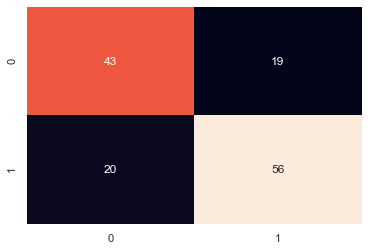

In [138]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

k_neighbour = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
k_neighbour.fit(X_train, y_train)
y_prediction  = k_neighbour.predict(X_test)

print(classification_report(y_test, y_prediction ))
sns.heatmap(confusion_matrix(y_test,y_prediction ), cbar=False, annot=True)

print("........................................................................")

print('Accuracy score: ', round(accuracy_score(y_test, y_prediction), 6))
print('F1 Score: ', round(f1_score( y_test, y_prediction), 6))

In [139]:
#List to store Accuracy scores 
#To be used in Model selection
mylist = []

cm = confusion_matrix(y_test, y_prediction)
ac = accuracy_score(y_test, y_prediction)
mylist.append(ac)
print(cm)
print(ac)

mylist

[[43 19]
 [20 56]]
0.717391304347826


[0.717391304347826]

[1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1
 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0]
........................................................................
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        62
           1       0.88      0.93      0.90        76

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138

........................................................................
Accuracy score:  0.891304
F1 Score:  0.904459


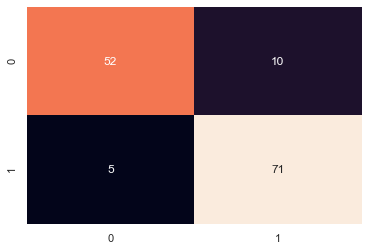

In [141]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest = forest.fit(X_train, y_train)
y_prediction = forest.predict(X_test)

print(y_prediction)
print("........................................................................")
print(classification_report(y_test, y_prediction))
sns.heatmap(confusion_matrix(y_test,y_prediction), cbar=False, annot=True)

print("........................................................................")

print('Accuracy score: ', round(accuracy_score(y_test, y_prediction), 6))
print('F1 Score: ', round(f1_score(y_test, y_prediction), 6))

In [142]:
# Confusion matrix & calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
ac = accuracy_score(y_test, y_prediction)
mylist.append(ac)
print(cm)
print(ac)

mylist

[[52 10]
 [ 5 71]]
0.8913043478260869


[0.717391304347826, 0.8913043478260869]

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        62
           1       0.92      0.93      0.93        76

    accuracy                           0.92       138
   macro avg       0.92      0.92      0.92       138
weighted avg       0.92      0.92      0.92       138

........................................................................
Accuracy score:  0.92029
F1 Score:  0.928105


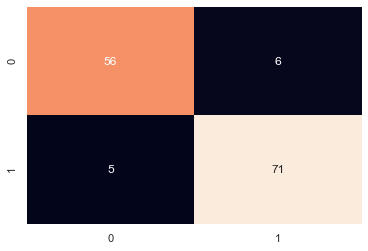

In [143]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42, n_estimators=100)
model = gb.fit(X_train, y_train)
y_prediction = gb.predict(X_test)

print(classification_report(y_test, y_prediction))
sns.heatmap(confusion_matrix(y_test,y_prediction), cbar=False, annot=True)

print("........................................................................")

print('Accuracy score: ', round(accuracy_score(y_test, y_prediction), 6))
print('F1 Score: ', round(f1_score(y_test, y_prediction), 6))

In [144]:
# Confusion matrix & calculating accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
ac = accuracy_score(y_test, y_prediction)
mylist.append(ac)
print(cm)
print(ac)

mylist

[[56  6]
 [ 5 71]]
0.9202898550724637


[0.717391304347826, 0.8913043478260869, 0.9202898550724637]

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        62
           1       0.78      0.80      0.79        76

    accuracy                           0.77       138
   macro avg       0.77      0.76      0.76       138
weighted avg       0.77      0.77      0.77       138

........................................................................
Accuracy score:  0.768116
F1 Score:  0.792208


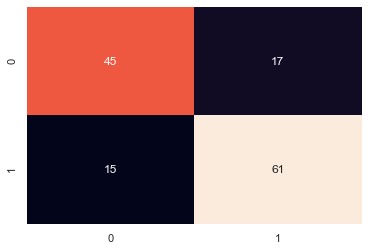

In [145]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
model = dt.fit(X_train, y_train)
y_prediction = model.predict(X_test)
print(classification_report(y_test, y_prediction))
      
sns.heatmap(confusion_matrix(y_test,y_prediction), cbar=False, annot=True)

print("........................................................................")

print('Accuracy score: ', round(accuracy_score(y_test, y_prediction), 6))
print('F1 Score: ', round(f1_score(y_test, y_prediction), 6))

In [146]:
# Confusion matrix & calculating accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
ac = accuracy_score(y_test, y_prediction)
mylist.append(ac)
print(cm)
print(ac)

mylist

[[45 17]
 [15 61]]
0.7681159420289855


[0.717391304347826, 0.8913043478260869, 0.9202898550724637, 0.7681159420289855]

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



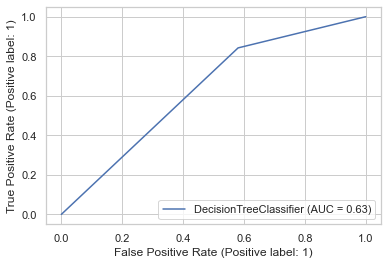

In [147]:
# sensitivity versus specificity comparison
plot_roc_curve(dt, Tested_X_train, y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



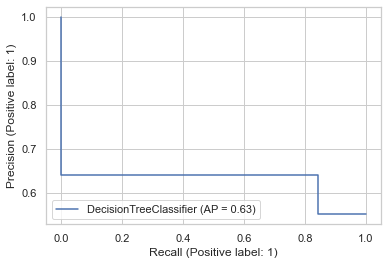

In [148]:
#Precision recall curve comparison
plot_precision_recall_curve(dt, Tested_X_train, y_test)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        62
           1       0.88      0.91      0.90        76

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

Accuracy score:  0.884058
F1 Score:  0.896104


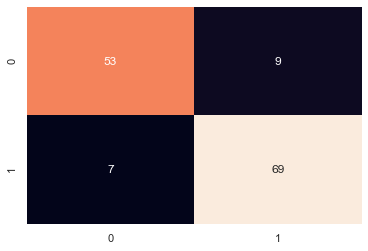

In [149]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

svc = SVC(kernel='linear')
model = svc.fit(X_train, y_train)
y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
sns.heatmap(confusion_matrix(y_test,y_prediction), cbar=False, annot=True)

print('Accuracy score: ', round(accuracy_score(y_test, y_prediction), 6))
print('F1 Score: ', round(f1_score(y_test, y_prediction), 6))

In [150]:
# Confusion matrix & calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
ac = accuracy_score(y_test, y_prediction)
mylist.append(ac)
print(cm)
print(ac)

mylist

[[53  9]
 [ 7 69]]
0.8840579710144928


[0.717391304347826,
 0.8913043478260869,
 0.9202898550724637,
 0.7681159420289855,
 0.8840579710144928]

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        62
           1       0.88      0.89      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.88       138
weighted avg       0.88      0.88      0.88       138

Accuracy score:  0.876812
F1 Score:  0.888889


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



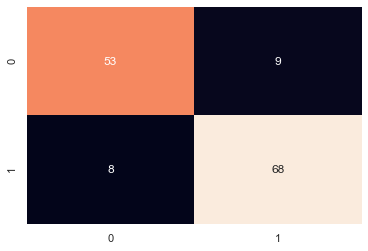

In [151]:
# Logistic Regression

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_prediction = lr.predict(X_test)

print(classification_report(y_test, y_prediction))
sns.heatmap(confusion_matrix(y_test,y_prediction), cbar=False, annot=True)

print('Accuracy score: ', round(accuracy_score(y_test, y_prediction), 6))
print('F1 Score: ', round(f1_score(y_test, y_prediction), 6))

In [152]:
# Confusion matrix & calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
ac = accuracy_score(y_test, y_prediction)
mylist.append(ac)
print(cm)
print(ac)

mylist

[[53  9]
 [ 8 68]]
0.8768115942028986


[0.717391304347826,
 0.8913043478260869,
 0.9202898550724637,
 0.7681159420289855,
 0.8840579710144928,
 0.8768115942028986]

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.87      0.91      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

........................................................................
Accuracy score:  0.876812
F1 Score:  0.890323


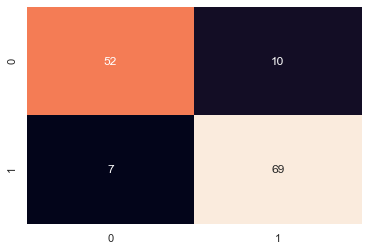

In [153]:
#AdaBoost Classifier
ada = AdaBoostClassifier()
ada = ada.fit(X_train, y_train)
y_prediction = ada.predict(X_test)

print(classification_report(y_test, y_prediction ))
sns.heatmap(confusion_matrix(y_test,y_prediction), cbar=False, annot=True)

print("........................................................................")

print('Accuracy score: ', round(accuracy_score(y_test, y_prediction), 6))
print('F1 Score: ', round(f1_score( y_test, y_prediction), 6))

In [154]:
# Confusion matrix & calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
ac = accuracy_score(y_test, y_prediction)
mylist.append(ac)
print(cm)
print(ac)

mylist

[[52 10]
 [ 7 69]]
0.8768115942028986


[0.717391304347826,
 0.8913043478260869,
 0.9202898550724637,
 0.7681159420289855,
 0.8840579710144928,
 0.8768115942028986,
 0.8768115942028986]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        62
           1       0.92      0.92      0.92        76

    accuracy                           0.91       138
   macro avg       0.91      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138

........................................................................
Accuracy score:  0.913043
F1 Score:  0.921053


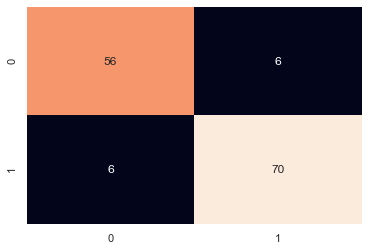

In [156]:
#CatBoost
from catboost import CatBoostClassifier

cc = CatBoostClassifier(silent=True )
cc = cc.fit(X_train, y_train)
y_prediction = cc.predict(X_test)

print(classification_report(y_test, y_prediction ))
sns.heatmap(confusion_matrix(y_test,y_prediction), cbar=False, annot=True)

print("........................................................................")

print('Accuracy score: ', round(accuracy_score(y_test, y_prediction), 6))
print('F1 Score: ', round(f1_score( y_test, y_prediction), 6))

In [157]:
# Confusion matrix & calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
ac = accuracy_score(y_test, y_prediction)
mylist.append(ac)
print(cm)
print(ac)

mylist

[[56  6]
 [ 6 70]]
0.9130434782608695


[0.717391304347826,
 0.8913043478260869,
 0.9202898550724637,
 0.7681159420289855,
 0.8840579710144928,
 0.8768115942028986,
 0.8768115942028986,
 0.9130434782608695]

In [158]:
# Accuracy scores list
mylist

[0.717391304347826,
 0.8913043478260869,
 0.9202898550724637,
 0.7681159420289855,
 0.8840579710144928,
 0.8768115942028986,
 0.8768115942028986,
 0.9130434782608695]

In [159]:
# Models list
models = ['K Nearest Neighbours','Random Forest','Gradient Boosting','Decision Tree','SVM','Logistic Regression','Ada Boost','Cat Boost'] 
models

['K Nearest Neighbours',
 'Random Forest',
 'Gradient Boosting',
 'Decision Tree',
 'SVM',
 'Logistic Regression',
 'Ada Boost',
 'Cat Boost']

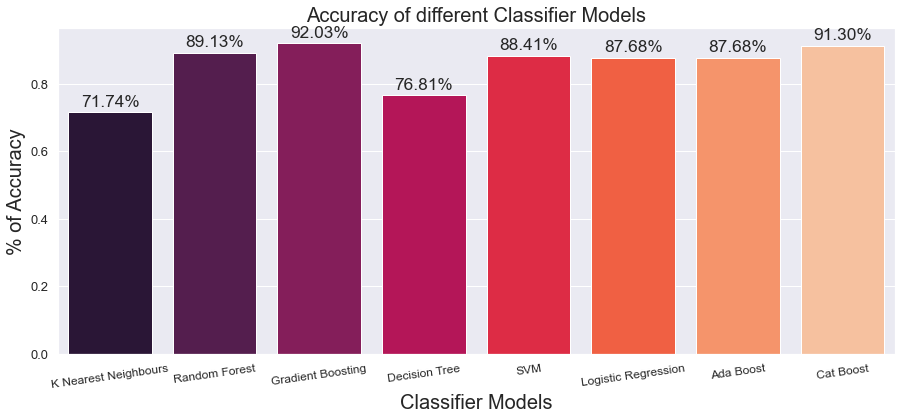

In [160]:
#Comparison of Models
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

From the above models Gradient Boosting classifier has the highest classification accuracy of 92.03% .

In [161]:
# Gradient Boost had the highest percentage
#Lets do further analysis
list_acc = []
models_list = []

X= heart_df.drop('HeartDisease', axis=1)
y= heart_df['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

model = GradientBoostingClassifier(verbose=False,random_state=0)

model.fit(X_train, y_train)
y_prediction = model.predict(X_test)
list_acc.append(round(accuracy_score(y_test, y_prediction), 6))

model_names = ['Gadient Boost score']
df1 = pd.DataFrame({'Accuracy':list_acc}, index=model_names)
df1

,Accuracy
Gadient Boost score,0.92029


We are Getting peak performance on the dataset with Gradient Boost 

## Conclusion
In our dataset, The features given are both categorical and numerical, and EDA analysis was done per feature by use of outliers. 

Our Target variable was `HeartDisease` since its a measure of wheather a patient has the disease or not hence the value 1 for True and 0 for False. 

Basing on the data its a clssification problem, hence We do analyse and predict the Heart Failure Prediction Dataset by a number of models(8) and classifiy the likelihood of one getting heart disease based on the input parameters like Gender, Age etc.

Data  was cleaned, Exploratory Data Analysis (EDA) done and found there were no missing values and non unique / duplicate values.

There was skewness in the dataset hence need for normalisation, however the skewness did not affect the final output.

From different models (adaboost, random forest, gradient boost, xgboost, etc) used the minimum accuracy score of 0.7 and the highest was 0.92  hence choosing Gradient Boosting as the best model in this prediction since it had the highest pecentage accuracy score.